In [1]:
from segment_anything import sam_model_registry, SamPredictor
import torch
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Suponiendo que ya cargaste la imagen RGB
image_bgr = cv2.imread('../data/imgs/001.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)


In [2]:
# Paso 2: Cargar modelo SAM
checkpoint_path = "../checkpoints/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry[model_type](checkpoint=checkpoint_path)
sam.to(device=device)
predictor = SamPredictor(sam)

In [3]:
# Paso 3: Predecir la máscara del objeto principal
predictor.set_image(image_rgb)
height, width, _ = image_rgb.shape
input_point = np.array([[width // 2, height // 2]])
input_label = np.array([1])
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True
)

# Paso 4: Elegir la mejor máscara
best_mask = masks[np.argmax(scores)]


In [4]:
# Paso 5: Aplicar máscara para remover fondo
mask_uint8 = (best_mask * 255).astype(np.uint8)
image_nobg = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_uint8)


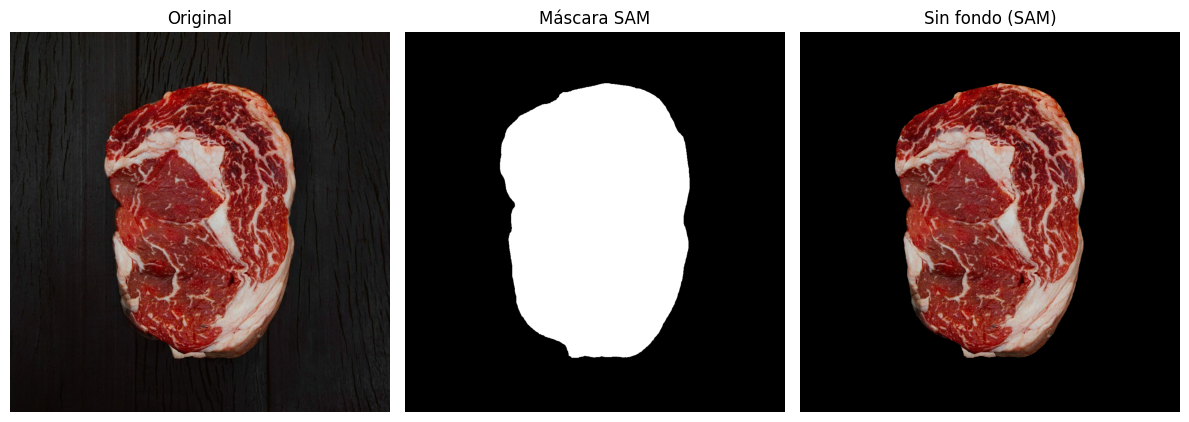

In [5]:

# Mostrar resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(best_mask, cmap="gray")
plt.title("Máscara SAM")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(image_nobg)
plt.title("Sin fondo (SAM)")
plt.axis("off")

plt.tight_layout()
plt.show()
